In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

# 1 Import Dataset

In [4]:
mnist = tf.keras.datasets.mnist
# 28x28 images of handwritten numbers

In [12]:
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

# scale the data / matrix numbers
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



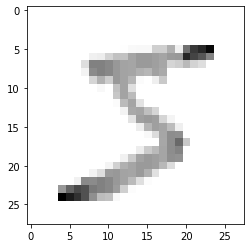

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

# print(x_train[0])

# 2 Build Model


In [19]:
# Sequential Model (Feed-Forward)
model = tf.keras.models.Sequential()

# add layers
# 1. input layer
model.add(tf.keras.layers.Flatten())

# 2. TWO Dense Layers -> ReLU activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# 3. Final Layer with 10 outputs, activations is softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# 3 Train and Compile
Models usually try to reduce what we got wrong (minimise loss), rather than optimising to accuracy.
Optimisers are (Complex!): SGD, Adam

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4 Train (fit)

In [22]:
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9249
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9677
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9828


# 5  Validation 
Loss and Accuracy validation. To detect overfitting.

In [23]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0995 - accuracy: 0.9702


# 6 Predict! :)

In [24]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [25]:
print(predictions)

[[7.4102569e-10 7.3722013e-08 1.0166353e-07 ... 9.9996722e-01
  6.6812316e-09 1.0927729e-05]
 [2.0167457e-07 1.7528118e-04 9.9933475e-01 ... 6.5159047e-09
  2.6093778e-05 2.6217407e-08]
 [7.6001008e-08 9.9987006e-01 3.3771687e-06 ... 2.3740615e-05
  6.8944821e-05 7.1717932e-07]
 ...
 [1.4935067e-09 1.0435684e-06 4.2734952e-10 ... 3.6156398e-05
  9.4326026e-07 4.4925098e-04]
 [3.2713178e-08 6.5555010e-09 1.7718953e-10 ... 1.8532949e-08
  1.4475997e-05 1.1563778e-09]
 [8.6884189e-09 4.5303199e-11 1.1599060e-11 ... 7.2143829e-15
  1.0803469e-08 3.0471563e-11]]


In [31]:
import numpy as np

print(np.argmax(predictions[1]))

2


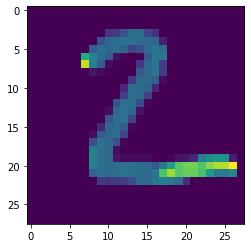

In [32]:
plt.imshow(x_test[1])
plt.show()